<h1 style="font-size: 55px;text-align: center;color:#000">The approach of Probability in Machine Learning</h1>

***

# Realized by 

| First name | Last name |
| :-: | :-: |
| $\;\;\;\;\;\;\;\;\;\;\;$ABDELLAH$\;\;\;\;\;\;\;\;\;\;\;$ | $\;\;\;\;\;\;\;\;\;\;\;$WALID$\;\;\;\;\;\;\;\;\;\;\;$ |
| $\;\;\;\;\;\;\;\;\;\;\;$MOUAD$\;\;\;\;\;\;\;\;\;\;\;$ | $\;\;\;\;\;\;\;\;\;\;\;$MIFTAH IDRISSI$\;\;\;\;\;\;\;\;\;\;\;$ |

***

# Table of Contents¶

* [1. Markov's inequality and Bienaymé-Chebyshev's inequality](#1.-Markov's-inequality-and-Bienaymé-Chebyshev's-inequality)
    * [1.1 Markov's inequality](#1.1-Markov's-inequality)
        * [1.1.1 Theorem](#1.1.1-Theorem)
        * [1.1.2 Proofs](#1.1.2-Proofs)
        * [1.1.3 Use Markov's inequality to bound the probability that a waiting time in a Restaurant is too long](#1.1.3-Use-Markov's-inequality-to-bound-the-probability-that-a-waiting-time-in-a-Restaurant-is-too-long)
    * [1.2 Bienaymé-Chebyshev's inequality](#1.2-Bienaymé-Chebyshev's-inequality)
        * [1.2.1 Theorem](#1.2.1-Theorem)
        * [1.2.2 Proofs](#1.2.2-Proofs)
        * [1.2.3 Bounding the probability of the sample mean blood pressure of hospital patients with Chebyshev's inequality](#1.2.3-Bounding-the-probability-of-the-sample-mean-blood-pressure-of-hospital-patients-with-Chebyshev's-inequality)

* [2. Conditional Expectation](#2.-Conditional-Expectation) 
    * [2.1 Introduction](#2.1-Introduction)
    * [2.2 Example of use](#2.2-Example-of-use)
        
* [3. Parzen Windows Approach](#3.-Parzen-Windows-Approach)
    * [3.1 Introduction](#3.1-Introduction)
        * [3.1.1 Putting it in context - Where would this method be useful?](#3.1.1-Putting-it-in-context---Where-would-this-method-be-useful?)
        * [3.1.2 where does this name Parzen-window come from?](#3.1.2-where-does-this-name-Parzen-window-come-from?)
    * [3.2 How to conduct an ANOVA test?](#3.2-How-to-conduct-an-ANOVA-test?)
        * [3.2.1 Two different approaches - fixed volume vs. fixed number of samples in a variable volume](#3.2.1-Two-different-approaches---fixed-volume-vs.-fixed-number-of-samples-in-a-variable-volume)
        * [3.2.2 Example 3D-hypercubes](#3.2.2-Example-3D-hypercubes)
        * [3.2.3 The window function](#3.2.3-The-window-function)
        * [3.2.4 Parzen-window estimation](#3.2.4-Parzen-window-estimation)
        * [3.2.5 Critical assumption: Convergence](#3.2.5-Critical-assumption:-Convergence)
        * [3.2.6 Critical parameters of the Parzen-window technique: window width and kernel](#3.2.6-Critical-parameters-of-the-Parzen-window-technique:-window-width-and-kernel)
        * [3.2.7 Implementing the Parzen-window estimation](#3.2.7-Implementing-the-Parzen-window-estimation)
    * [3.3 Using the kernel density estimation for a pattern classification task](#3.3-Using-the-kernel-density-estimation-for-a-pattern-classification-task) 
        * [3.3.1 Density estimation via the Parzen-window technique](#3.3.1-Density-estimation-via-the-Parzen-window-technique) 
        * [3.3.2 Implementing the classifier using Bayes’ decision rule](#3.3.2-Implementing-the-classifier-using-Bayes’-decision-rule) 
        * [3.3.3 Classifying the test data and calculating the error rate](#3.3.3-Classifying-the-test-data-and-calculating-the-error-rate) 
        * [3.3.4 Implementation in 2-dimensional data case](#3.3.4-Implementation-in-2-dimensional-data-case) 
        * [3.3.5 Implementation in 3-dimensional data case](#3.3.5-Implementation-in-3-dimensional-data-case)
        
* [4. Estimators](#4.-Estimators)
   * [4.1 Point Estimators](#4.1-Point-Estimators)
      * [4.1.1 What's a point Point Estimator](#4.1.1.-What's-a-point-Point-Estimator)
      * [4.1.2 An example of how you can use the sample mean as a point estimator for the population mean](#4.1.2.-An-example-of-how-you-can-use-the-sample-mean-as-a-point-estimator-for-the-population-mean)
   * [4.2 Interval Estimators - Confidence Interval](#4.2.-Interval-Estimators---Confidence-Interval)
      * [4.2.1 What do I need the confidence interval for?](#4.2.1-What-do-I-need-the-confidence-interval-for?)
      * [4.2.2 Calculate confidence interval](#4.2.2-Calculate-confidence-interval)
      * [4.2.3 Steps to calculate the confidence interval](#4.2.3-Steps-to-calculate-the-confidence-interval)
   * [4.3 Maximum Likelihood Estimation](#4.3.-Maximum-Likelihood-Estimation)
      * [4.3.1 How to calculate the maximum likelihood](#4.3.1-How-to-calculate-the-maximum-likelihood)
         * [4.3.1.1 Defining the likelihood function.](#4.3.1.1-Defining-the-likelihood-function.)
         * [4.3.1.2 Defining the statistical model.](#4.3.1.2-Defining-the-statistical-model.)
         * [4.3.1.3 Maximize the likelihood function](#4.3.1.3-Maximize-the-likelihood-function)
      * [4.3.2 Maximum likelihood estimation for the regression parameters](#4.3.2.-Maximum-likelihood-estimation-for-the-regression-parameters)

***

# 1. Markov's inequality and Bienaymé-Chebyshev's inequality

## 1.1 Markov's inequality

Recall that our general theme is to upper bound tail probabilities, i.e., probabilities of the form
$P(X \ge c \cdot E[X])$ or $P(X \le c \cdot E[X])$. The first tool towards that end is Markov's Inequality.
**Note.** This is a simple tool, but it is usually quite weak. It is mainly used to derive stronger tail bounds, such as Chebyshev's Inequality.

### 1.1.1 Theorem

Let $X$ be a non-negative random variable. Then,

$$
P(X \ge a) \le \frac{E[X]}{a} ,\;\;\;\text{ for any }\; a \gt 0
$$

Before we discuss the proof of Markov’s Inequality, first let’s look at a picture that illustrates the event that we are looking at.

![caption](ReportFigures/Fig3.png)

### 1.1.2 Proofs

**Proof-1 :** Suppose $X$ is a discrete random variable, for simplicity.
 
$$
E[X] = \sum_{x}x \cdot P(X = x)\\
\;\;\;\;\;\;\;\ge \sum_{x \ge a}x \cdot P(X = x)\\
\;\;\;\;\;\;\;\ge a \cdot \sum_{x \ge a} P(X = x)\\
\;\;= a \cdot P(X \ge a)
$$
 
Rearranging, we get
 
$$
P(X \ge a) \le \frac{E[X]}{a}
$$

$$$$

**Proof-2 :** Define a random variable Y as follows 
$
\begin{cases}
      1 \;\;\;\;\;\; \text{if}\;\; X \ge a\\
      0 \;\;\;\;\;\; otherwise
\end{cases}
$

Now, if $X \lt a$, $Y = 0$. Otherwise, $X \ge a$, in which case $Y = 1$. In both cases, we have that $Y \le \frac{X}{a}$. Note that we use the fact that $X$ is a non-negative random variable in the first case.

Therefore, $E[Y] \le \frac{E[X]}{a}$. However, since $Y$ is an indicator random variable, $E[Y] = P(Y = 1) = P(X \ge a)$. This implies that $P(X \ge a) \le \frac{E[X]}{a}$.

### 1.1.3 Use Markov's inequality to bound the probability that a waiting time in a Restaurant is too long

In this example, we will use The Restaurant Waiting Time dataset from Kaggle, that contains information about the waiting times for customers at restaurants in an unnamed city. It includes the following columns:

* **ID :** A unique identifier for each restaurant.
* **People Count :** the number of people present in the restaurant.
* **Waiting_time :** The average waiting time for customers at the restaurant (in minutes).
* **Restaurant capacity :** Restaurant capacity refers to the maximum number of customers that restaurant can accommodate.

The dataset can be found under the following link: https://www.kaggle.com/datasets/greenpeaz/restaurant-waiting-time

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/Waiting_time.csv')

In [3]:
df

,ID,People Count,Waiting time(mins),Restaurant capacity
0,1,4,16.0,50
1,2,3,11.2,50
2,3,5,19.3,50
3,4,4,15.8,50
4,5,1,4.3,50
5,6,2,8.2,50
6,7,8,30.0,50
7,8,11,41.8,50
8,9,15,57.9,50
9,10,13,50.1,50


**This code will print the probability that the waiting time is above 50 minutes.**

Compute the expected waiting time

In [4]:
expected_time = df["Waiting time(mins)"].mean()

Set the threshold waiting time

In [5]:
threshold_time = 50

Compute the probability that the waiting time is above the threshold using Markov's inequality

In [6]:
prob = df["Waiting time(mins)"].mean() / threshold_time

print(f'Probability of waiting more than {threshold_time} minutes: {prob:.2f} ({prob*100:.0f}%)')

Probability of waiting more than 50 minutes: 0.79 (79%)


## 1.2 Bienaymé-Chebyshev's inequality

In order to get more information about a random variable, we can use moments of a random variable.

**Moment :** The $k^{th}$ moment of a random variable $X$ is $E[X^{k}]$.

Higher moments often reveal more information about a random variable, which, in turn helps us derive better bounds. However, there is a trade-off. It is often difficult to compute higher moments in practical cases, e.g., while analyzing randomized algorithms. 

Now, let us look at the variance of a random variable.

**Variance :** The variance of a random variable $X$, denoted as $Var[X]$, is $E[(X −E[X])^{2}]$.

The variance of a random variable can be seen as the expected square of the distance of $X$, from its expected value $E[X]$. Another way to look at $Var[X]$ is as follows.

$$
Var[X] = E[(X − E[X])^{2}]\\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= E[X^{2} − 2 \cdot X \cdot E[X] + E[X]^{2}]\\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= E[X^{2}] − E[2E[X] \cdot X] + E[E[X]^{2}]\\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= E[X^{2}] − 2E[X] \cdot E[X] + E[X]^{2}\\
= E[X^{2}] − E[X]^{2}.
$$

That is, the variance of $X$ equals the difference between the second moment of $X$, and the square of the expected value of $X$ (i.e., the square of the first moment of $X$).

Now, we can derive Chebyshev’s Inequality, which often gives much stronger bounds than the Markov’s Inequality.

### 1.2.1 Theorem

For any $a \gt 0$,

$$
P(|X − E[X]| \ge a) \le \frac{Var[X]}{a^{2}}.
$$

or 

$$
P(|X − E[X]| \ge a) \le \frac{σ[X]^{2}}{a^{2}}\\
\Rightarrow σ[X] = \sqrt{Var[X]}
$$

or

$$
P(|X − E[X]| \ge a \cdot σ[X]) \le \frac{1}{a^{2}}.
$$

Again, let us look at a picture that illustrates Chebyshev’s Inequality.

![caption](ReportFigures/Fig4.png)

### 1.2.2 Proofs

$$
P(|X − E[X]| \ge a) = P((X − E[X])^{2} \ge a^{2})= P(Y \ge a^{2})
$$


Where, $Y = (X − E[X])^{2}$. Note that Y is a non-negative random variable. Therefore, using Markov’s Inequality,

$$
P(Y \ge a^{2}) \le \frac{E[Y]}{a^{2}} = \frac{E((X − E[X])^{2})}{a^{2}} = \frac{Var[X]}{a^{2}}
$$

### 1.2.3 Bounding the probability of the sample mean blood pressure of hospital patients with Chebyshev's inequality

Here is an example of how Chebyshev's inequality might be used in a real-world scenario:

Suppose you are a healthcare professional working in a hospital, and you want to ensure that the average blood pressure of patients admitted to the hospital is within a certain range. To do this, you decide to use Chebyshev's inequality to bound the probability that the average blood pressure of a sample of patients is far from the population mean blood pressure.

You know that the population mean blood pressure of patients admitted to the hospital is 120/80 mmHg, and the standard deviation of the blood pressure is 10/5 mmHg. You want to ensure that the probability of the average blood pressure of a sample of 50 patients being more than 20/10 mmHg away from the population mean is less than 1%.

>In the context of Chebyshev's inequality, the upper bound and lower bound are related to the inequality by the fact that they define the maximum and minimum values, respectively, of a random variable X within which the probability of X being outside of this interval is less than or equal to a specified value.
>
>The upper bound and lower bound can be computed using the following formula:
>
>$\;\;\; upper\text{_}bound = E[X] + a \cdot σ[X] \\ \;\;\; lower\text{_}bound = E[X] - a \cdot σ[X]$

To achieve this, you can use Chebyshev's inequality as follows:

In [7]:
import numpy as np

Set the population mean and standard deviation

In [8]:
pop_mean = (120, 80)
pop_std = (10, 5)

Set the desired probability

In [9]:
prob = 0.01

Compute the value of k that gives the desired probability

In [10]:
a = np.sqrt(1 / prob)

Compute the upper and lower bounds on the sample mean using Chebyshev's inequality
>In the context of Chebyshev's inequality, the term $\sqrt{50}$ is used to scale the $a \cdot σ[X]$ term based on the sample size. It is important to note that the sample size affects the precision of the estimates obtained using Chebyshev's inequality, and a larger sample size will generally result in more precise estimates.

In [11]:
upper_bound = (pop_mean[0] + a * pop_std[0] / np.sqrt(50), pop_mean[1] + a * pop_std[1] / np.sqrt(50))
lower_bound = (pop_mean[0] - a * pop_std[0] / np.sqrt(50), pop_mean[1] - a * pop_std[1] / np.sqrt(50))

print(f'The upper bound on the sample mean is {upper_bound[0]:.2f}/{upper_bound[1]:.2f} mmHg.')
print(f'The lower bound on the sample mean is {lower_bound[0]:.2f}/{lower_bound[1]:.2f} mmHg.')

The upper bound on the sample mean is 134.14/87.07 mmHg.
The lower bound on the sample mean is 105.86/72.93 mmHg.


This code will print the upper and lower bounds on the sample mean blood pressure for a sample of 50 patients, such that the probability of the sample mean being more than 20/10 mmHg away from the population mean is less than 1%.

In this example, Chebyshev's inequality can be used to ensure that the average blood pressure of a sample of patients admitted to the hospital is representative of the population mean blood pressure.

 ***

# 2. Conditional Expectation

## 2.1 Introduction

Conditional expectation of a random variable is the value that we would expect it take, on the condition that another variable that it depends on, takes up a specific value. <br>
The expected value of Y, denoted E(Y), is the sum of the product of:
- Every value of Y in its range $[0, ∞]$, and,
- Its corresponding probability P(Y=y). in other words, the following:
$$
E(Y)=\sum_{i=0}^{\infty}y_{i} \cdot P(Y=y_{i})
$$
The thing with expected value is that if you were to put your money on any value of Y, E(Y) is what you should bet on.


The conditional expectation is a statistical measure that represents the average value of a random variable, given certain conditions. It is calculated by taking the expected value of the random variable, based on its conditional probability distribution.<br>
In other words, the conditional expectation is a prediction of the likely value of a random variable, based on certain known factors. It can be thought of as the "best guess" of the value of the random variable, given the available information.
<br> <br>
Suppose we have two discrete random variables X and Y. with x ∈ Range(X), the condition expectation of Y given X = x:

$$
E(Y|X=x)=\sum_{y\in Range(Y)}y_{i} \cdot P(Y|X=x(y))
$$

**Note:** X given Y = y is defined in the same way (just switch the variables).



## 2.2 Example of use

**Here is an example of how to calculate the conditional expectation of a data set**

In [12]:
import pandas as pd
import seaborn as sns
# Load the "titanic" data set from the Seaborn library
df = sns.load_dataset("titanic")
df 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**The "titanic" data set contains information about the passengers on the Titanic, including their passenger class (first, second, or third), sex, age, fare price, and whether or not they survived the sinking of the ship. It is a widely used dataset for demonstrating data analysis techniques, and it contains the following columns:**

- survived: Survival (0 = No; 1 = Yes)
- pclass: Passenger class (1 = First; 2 = Second; 3 = Third)
- sex: Sex
- age: Age
- fare: Fare price
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) <br><br>

**The data set includes 891 rows, representing the 891 passengers on the Titanic.**

In [13]:
# Group the data by sex and calculate the mean fare for each group
sex_groups = df.groupby("sex")["fare"].mean()

# Print the conditional expectation of fare given sex
print(sex_groups) 

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64


We group the data by the "sex" column and calculate the mean fare for each group (male and female).<br> The resulting series will have the form sex: mean_fare, which represents **the conditional expectation** of fare given sex.

We can also use the pandas library to calculate the conditional expectation for multiple conditions. For example, to calculate the conditional expectation of fare given both sex and class (first, second, or third) :

In [14]:
# Group the data by sex and class and calculate the mean fare for each group
sex_class_groups = df.groupby(["sex", "class"])["fare"].mean()

# Print the conditional expectation of fare given sex and class
print(sex_class_groups)


sex     class 
female  First     106.125798
        Second     21.970121
        Third      16.118810
male    First      67.226127
        Second     19.741782
        Third      12.661633
Name: fare, dtype: float64


This code will group the data by both sex and class, and calculate the mean fare for each group.

The resulting series will have the form (sex, class): mean_fare, which represents the conditional expectation of fare given both sex and class.

***

# 3. Parzen Windows Approach

## 3.1 Introduction

The Parzen-window method (also known as Parzen-Rosenblatt window method) is a widely used non-parametric approach to estimate a probability density function $p(x)$ for a specific point $p(x)$ from a sample $p(x_{n})$ that doesn’t require any knowledge or assumption about the underlying distribution.

### 3.1.1 Putting it in context - Where would this method be useful?

A popular application of the Parzen-window technique is to estimate the class-conditional densities (or also often called ‘likelihoods’) $p(x | ω_{i})$ in a supervised pattern classification problem from the training dataset (where $p(x)$ refers to a multi-dimensional sample that belongs to particular class $ω_{i}$)).

Imagine that we are about to design a Bayes classifier for solving a statistical pattern classification task using Bayes’ rule:

$$
P(ω_{i} | x) = \frac{p(x | ω_{i}) \cdot P(ω_{i})}{p(x)}
$$

$$
posterior \text{ } probability = \frac{likelihood \cdot prior \text{ } probability}{evidence}
$$

If the parameters of the the class-conditional densities (also called likelihoods) are known, it is pretty easy to design the classifier.

>**About the mathematical notation:**
>
>Throughout this article, I will be adopting the common matrix notation that is used by most algebra textbooks:
>
>lowercase letter in italics (e.g., x) for vectors
>
>capital letter in italics (e.g., A) for matrices
>
>the subscripts to refer to elements by row and columns (e.g., $A_{ij}$ for cell in row $i$ and column $j$))

However, it becomes much more challenging, if we don’t don’t have prior knowledge about the underlying parameters that define the model of our data.

Imagine we are about to design a classifier for a pattern classification task where the parameters of the underlying sample distribution are not known. Therefore, we wouldn’t need the knowledge about the whole range of the distribution; it would be sufficient to know the probability of the particular point, which we want to classify, in order to make the decision. And here we are going to see how we can estimate this probability from the training sample.

However, the only problem of this approach would be that we would seldom have exact values - if we consider the histogram of the frequencies for a arbitrary training dataset. Therefore, we define a certain region (i.e., the **Parzen-window**) around the particular value to make the estimate.

### 3.1.2 where does this name Parzen-window come from?

As it was quite common in the earlier days, this technique was named after its inventor, Emanuel Parzen, who published his detailed mathematical analysis in 1962 in the Annals of Mathematical Statistics. About the same time, a second statistician, Murray Rosenblatt, discovered (or developed) this technique independently from Parzen so that the method is sometimes also referred to as Parzen-Rosenblatt window method.

## 3.2 Defining the Region Rn

The basis of this approach is to count how many samples fall within a specified region $R_{n}$ (or “window” if you will). Our intuition tells us, that (based on the observation), the probability that one sample falls into this region is :

$$
p(x) = \frac{number  \text{ }  of  \text{ }  samples  \text{ }  in  \text{ }  R}{total  \text{ }  samples}
$$

To tackle this problem from a more mathematical standpoint to estimate "the probability of observing $k$ points out of $n$ in a Region $R$" we consider a binomial distribution.

$$
p_{k} = \binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}
$$

and make the assumption that in a binomial distribution, the probability peaks sharply at the mean, so that:

$$
E[k] = n \cdot p \sim k = n \cdot p
$$

And if we think of the probability as a continuous variable, we know that it is defined as:

$$
p(x) = \int_{R} dx = p(x) \cdot V
$$

where $V$ is the volume of the region R, and if we rearrange those terms, so that we arrive at the following equation, which we will use later:

$$
\frac{k}{n} = p(x) \cdot V
$$

$$
p(x) = \frac{\frac{k}{n}}{V}
$$

This simple equation above (i.e, the “probability estimate”) lets us calculate the probability density of a point $x$ by counting how many points $k$ fall in a defined region (or volume).

### 3.2.1 Two different approaches - fixed volume vs. fixed number of samples in a variable volume

Now, there are two possible approaches to estimate the densities at different points $p(x)$.

### Case 1 - fixed volume:
For a particular number $n$(= number of total points), we use volume $V$ of a fixed size and observe how many points $k$ fall into the region. In other words, we use the same volume to make an estimate at different regions.(**The Parzen-window technique falls into this category!**)

![caption](ReportFigures/Fig1.png)

### Case 2 - fixed k:
For a particular number $n$(= number of total points), we use a fixed number $k$ (number of points that fall inside the region or volume) and adjust the volume accordingly. (**The k-nearest neighbor technique uses this approach!**)

![caption](ReportFigures/Fig2.png)

### 3.2.2 Example 3D-hypercubes 

To illustrate this with an example and a set of equations, let us assume this region $R_{n}$ is a hypercube. And the volume of this hypercube is defined by $V_{n} = h_{n}\text{ }^{d}$, where hn is the length of the hypercube, and $d$ is the number of dimensions.
For an 2D-hypercube with length 1, for example, this would be $V_{1} = 1^{2}$ and for a 3D hypercube $V_{1} = 1^{3}$, respectively.

So let us visualize such a simple example: a typical 3-dimensional unit hypercube $(h_{1} = 1)$ representing the region $R_{1}$, and 10 sample points, where 3 of them lie within the hypercube (red triangles), and the other 7 outside (blue dots).

**Note that using a hypercube would not be an ideal choice for a real application, but it certainly makes the implementations of the following steps a lot shorter and easier to follow.**

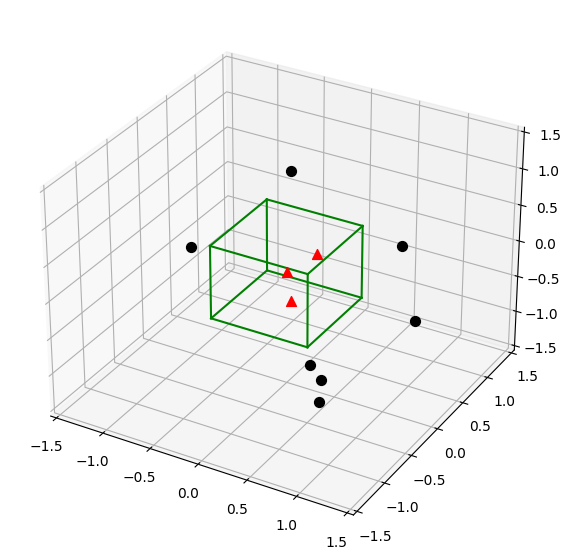

In [15]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.set_aspect("auto")

# Plot Points

# samples within the cube
X_inside = np.array([[0,0,0],[0.2,0.2,0.2],[0.1, -0.1, -0.3]])

X_outside = np.array([[-1.2,0.3,-0.3],[0.8,-0.82,-0.9],[1, 0.6, -0.7],
                  [0.8,0.7,0.2],[0.7,-0.8,-0.45],[-0.3, 0.6, 0.9],
                  [0.7,-0.6,-0.8]])

for row in X_inside:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X_outside:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

# Plot Cube
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

### 3.2.3 The window function

Once we visualized the region $R_{1}$ like above, it is easy and intuitive to count how many samples fall within this region, and how many lie outside. To approach this problem more mathematically, we would use the following equation to count the samples $k_{n}$ within this hypercube, where $φ$ is our so-called window function

$$
φ(u) = 
\begin{cases}
      1 \;\;\;\;\;\; |u_{j}| \leqslant 1/2 \; ;  \;\;\;\;\;\; j=1,...,d\\
      0 \;\;\;\;\;\; otherwise
\end{cases}
$$

for a hypercube of unit length 1 centered at the coordinate system’s origin.

What this function basically does is assigning a value 1 to a sample point if it lies within 1/2 of the edges of the hypercube, and 0 if lies outside (note that the evaluation is done for all dimensions of the sample point).

If we extend on this concept, we can define a more general equation that applies to hypercubes of any length $h_{n}$ that are centered at $x$:

$$
k_{n} = \sum_{i=1}^{n}φ(\frac{x-x_{i}}{h_{n}})
$$

$$
\text{where }u = (\frac{x-x_{i}}{h_{n}})
$$

### Implementing the window function

In [16]:
def window_function(x_vec, unit_len=1):
    """
    Implementation of the window function. Returns 1 if 3x1-sample vector
    lies within a origin-centered hypercube, 0 otherwise.

    """
    for row in x_vec:
        if np.abs(row) > (unit_len/2):
            return 0
    return 1

Using the window function that we just implemented above, let us now quantify how many points actually lie inside and outside the hypercube.

In [17]:
X_all = np.vstack((X_inside,X_outside))
assert(X_all.shape == (10,3))

k_n = 0
for row in X_all:
    k_n += window_function(row.reshape(3,1))

print('Points inside the hypercube:', k_n)
print('Points outside the hybercube:', len(X_all) - k_n)

Points inside the hypercube: 3
Points outside the hybercube: 7


### 3.2.4 Parzen-window estimation

Based on the window function that we defined in the section above, we can now formulate the Parzen-window estimation with a hypercube kernel as follows:

$$
p_{n}(x) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{h^{d}}φ[\frac{x-x_{i}}{h_{n}}]
$$

where

$$
h^{d} = V_{n} \;\;\;and\;\;\; φ[\frac{x-x_{i}}{h_{n}}] = k
$$

And applying this to our unit-hypercube example above, for which 3 out of 10 samples fall inside the hypercube (into region $R$), we can calculate the probability $p(x)$ that x samples fall within region $R$ as follows:

$$
p(x) = \frac{\frac{k}{n}}{h^{d}} = \frac{\frac{3}{10}}{1^{3}} = \frac{3}{10} = 0.3
$$

### 3.2.5 Critical assumption: Convergence

One of the most critical assumptions why the Parzen-window technique works (as well as the k-nearest neighbor technique) is that $p_{n}$ (where the subscript $n$ denotes the “number of samples”) converges to the true density $p(x)$ when we assume an infinite number of training samples, which was nicely shown by Emanuel Parzen in his paper.

### 3.2.6 Critical parameters of the Parzen-window technique: window width and kernel

The two critical parameters in the Parzen-window techniques are :

**1) window width :**
Let us skip this part for now and discuss and explore the question of choosing an appropriate window width later by using an hands-on example.

**2) kernel :**
Most commonly, either a hypercube or a Gaussian kernel is used for the window function. But how do we know which is better? It really depends on the training sample. In practice, the choice is often made by testing the derived pattern classifier to see which method leads to a better performance on the test data set.
Intuitively, it would make sense to use a Gaussian kernel for a data set that follows a Gaussian distribution. **But remember, the whole purpose of the Parzen-window estimation is to estimate densities of a unknown distribution!** So, in practice we wouldn’t know whether our data stems from a Gaussian distribution or not (otherwise we wouldn’t need to estimate, but can use a parametric technique like MLE or Bayesian Estimation).
If we would decide to use a Gaussian kernel instead of the hypercube, we can just simply swap the terms of the window function, which we defined above for the hypercube, by:

$$
\frac{1}{(\sqrt{2\pi})^{d}h^{d}_{n}}exp\;[-\frac{1}{2}(\frac{x-x_{i}}{h_{n}})^{2}]
$$

The Parzen-window estimation would then look like this :

$$
p_{n}(x) = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{h^{d}}φ[\frac{1}{(\sqrt{2\pi})^{d}h^{d}_{n}}exp\;[-\frac{1}{2}(\frac{x-x_{i}}{h_{n}})^{2}]\;]
$$
>**mixing different kernels:**
In some papers you will see, that the authors mixed hypercube and Gaussian kernels to estimate the densities at different regions. In practice, this might work very well, however, but note that in theory this would violate on of the underlying principles: that the density integrates to 1.
>
>$$ \lim_{n \to \infty} p_{n}(x) = p(x) $$
>
>A few other requirements are that at the limit the volume we choose for the Parzen-window becomes infinite small.
>
>$$ \lim_{n \to \infty} V_{n} = 0 $$
>
>The number of points $k_{n}$ in this region converges to:
>
>$$ \lim_{n \to \infty} k_{n} = \infty $$
>
>from which we can conclude:
>
>$$ \lim_{n \to \infty} \frac{k_{n}}{n} = 0 $$


### 3.2.7 Implementing the Parzen-window estimation

In [18]:
def parzen_window_est(x_samples, h=1, center=[0,0,0]):
    '''
    Implementation of the Parzen-window estimation for hypercubes.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row.
        h: The length of the hypercube.
        center: The coordinate center of the hypercube

    Returns the probability density for observing k samples inside the hypercube.

    '''
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions),\
            'Number of center coordinates have to match sample dimensions'
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / len(x_samples)) / (h**dimensions)

In [19]:
print('p(x) =', parzen_window_est(X_all, h=1))

p(x) = 0.3


## 3.3 Using the kernel density estimation for a pattern classification task

In the introduction I mentioned that a popular application of the Parzen-window technique is to estimate the class-conditional densities (or also often called ‘likelihoods’) $p(x^{*} | ω)^{*}$ in a supervised pattern classification problem from the training dataset (where $x$ is a multi-dimensional sample that belongs to particular class $ω_{i}$).
Now, let us use the kernel density estimation for designing a simple Bayes-classifier.

**Bayes’ Rule**

To design a minimum error classifier, we will use Bayes’ rule:

$$
P(ω_{i} | x) = \frac{p(x | ω_{i}) \cdot P(ω_{i})}{p(x)}
$$

$$
posterior \text{ } probability = \frac{likelihood \cdot prior \text{ } probability}{evidence}
$$

**Decision Rule**

Where the posterior probability is used to define our decision rule. E.g., for a simple 2-class problem with the two class labels $ω_{1}$ and $ω_{2}$:

decide $ω_{1}$ if $P(ω_{1} | ^{*}x ) \gt P(ω_{2} | x )$, else decide $^{*}ω_{2}$

**Objective function**

For this example, let us simplify the problem a little bit. We will assume that we have equal prior probabilities (the probability to encounter a particular class is equal):
$P(ω_{1} | ^{*}x )^{*} = P(ω_{2} | ^{*}x )^{*} = … = P(ω_{1} | ^{*}x )^{*} = \frac{1}{n}$

And since $p(x)$ is just a scale factor that is equal for all posterior probabilities, we can drop it from the equation.

Now, we can simplify the decision rule, so that it just depends on the priors. For a 2-class problem, this would be

decide $ω_{1}$ if $P(ω_{1} | ^{*}x ) \gt P(ω_{2} | x )$, else decide $^{*}ω_{2}$

**Bayes classifier**

And in more general (for multiple classes), our classifier becomes
$ω_{j} \rightarrow max[P(ω_{1} | ^{*}x )] \;\;\;\;for\;\; ^{*}j = 1, 2, …, c$

### 3.3.1 Density estimation via the Parzen-window technique

In [20]:
def hypercube_kernel(h, x, x_i):
    """
    Implementation of a hypercube kernel for Parzen-window estimation.

    Keyword arguments:
        h: window width
        x: point x for density estimation, 'd x 1'-dimensional numpy array
        x_i: point from training sample, 'd x 1'-dimensional numpy array

    Returns a 'd x 1'-dimensional numpy array as input for a window function.

    """
    assert (x.shape == x_i.shape), 'vectors x and x_i must have the same dimensions'
    return (x - x_i) / (h)


def parzen_window_func(x_vec, h=1):
    """
    Implementation of the window function. Returns 1 if 'd x 1'-sample vector
    lies within inside the window, 0 otherwise.

    """
    for row in x_vec:
        if np.abs(row) > (1/2):
            return 0
    return 1


def parzen_estimation(x_samples, point_x, h, d, window_func, kernel_func):
    """
    Implementation of a parzen-window estimation.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row. (= training sample)
        point_x: point x for density estimation, 'd x 1'-dimensional numpy array
        h: window width
        d: dimensions
        window_func: a Parzen window function (phi)
        kernel_function: A hypercube or Gaussian kernel functions

    Returns the density estimate p(x).

    """
    k_n = 0
    for row in x_samples:
        x_i = kernel_func(h=h, x=point_x, x_i=row[:-1])
        k_n += window_func(x_i, h=h)
    return (k_n / len(x_samples)) / (h**d)

### 3.3.2 Implementing the classifier using Bayes’ decision rule

In [21]:
import operator

def bayes_classifier(x_samples, point_x, h, d, classIndix):
    """
    Classifies an input sample into class w_j determined by
    maximizing the class conditional probability for p(x|w_j).

    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        kdes: List of the gausssian_kde (kernel density) estimates

    Returns a tuple ( p(x|w_j)_value, class label ).

    """
    dimension = x_samples.shape[0]
    p_vals = []
    for cInd in classIndix:
        p_vals.append(parzen_estimation(x_samples[x_samples[:,-1] == cInd], point_x, h=h, d=d, 
                                        window_func=parzen_window_func, 
                                        kernel_func=hypercube_kernel))
        
    max_index, max_value = max(enumerate(p_vals), key=operator.itemgetter(1))
    return (max_value, max_index + 1)

### 3.3.3 Classifying the test data and calculating the error rate

In [22]:
def empirical_error(x_train, x_test, h, d, classIndix, classifier_func):
    """
    Keyword arguments:
        data_set: 'n x d'- dimensional numpy array, class label in the last column.
        classes: List of the class labels.
        classifier_func: Function that returns the max argument from the discriminant function.
            evaluation and the class label as a tuple.
        classifier_func_args: List of arguments for the 'classifier_func'.
    
    Returns a tuple, consisting of a dictionary withthe classif. counts and the error.
    
    e.g., ( {1: {1: 321, 2: 5}, 2: {1: 0, 2: 317}}, 0.05)
    where keys are class labels, and values are sub-dicts counting for which class (key)
    how many samples where classified as such.
    
    """
    class_dict = {i:{j:0 for j in classIndix} for i in classIndix}

    for cl in classIndix:
        for row in x_test[x_test[:,-1] == cl][:,:-1]:
            g = classifier_func(x_train, row, h, d, classIndix)
            class_dict[cl][g[1]] += 1
    
    correct = 0
    for i in classIndix:
        correct += class_dict[i][i]
    
    misclass = x_test.shape[0] - correct
    return (class_dict, misclass / test_set.shape[0])

### 3.3.4 Implementation in 2-dimensional data case

Let us generate random 2-dimensional data for 3 classes from a multivariate Gaussian distribution with the following parameters:

$$
p(x|ω_{1}) \sim	N(u_{i}, \Sigma_{i}) \sim \frac{1}{(\sqrt{2\pi})^{d}|\Sigma|^{1/2}}exp\;[-\frac{1}{2}(x-u)^{t}\Sigma^{-1}(x-u)]
$$
$$ \\ $$
$$
p([x_{1},x_{2}]^{t}|ω_{1}) \sim N([0,0]^{t},1I),\\
p([x_{1},x_{2}]^{t}|ω_{2}) \sim N([3,0]^{t},2I),\\
p([x_{1},x_{2}]^{t}|ω_{3}) \sim N([4,5]^{t},3I),\\
$$

and

$$
P(ω_{1}) = P(ω_{2}) = P(ω_{3}) = \frac{1}{3}
$$

Now, we will create 120 random samples for each of the 3 classes, and divide it into a equally-sized training and test data set, so that each set will contain 30 samples from each class.

In [23]:
import numpy as np

# Covariance matrices
cov_mats = {}
for i in range(1,4):
    cov_mats[i] = i * np.eye(2)

# mean vectors    
mu_vecs = {}
for i,j in zip(range(1,4), [[0,0], [3,0], [4,5]]):
    mu_vecs[i] = np.array(j).reshape(2,1)

In [24]:
# Generating the random samples
all_samples = {}
for i in range(1,4):
    # generating 40x2 dimensional arrays with random Gaussian-distributed samples
    class_samples = np.random.multivariate_normal(mu_vecs[i].ravel(), cov_mats[i], 40)
    # adding class label to 3rd column
    class_samples = np.append(class_samples, np.zeros((40,1))+i, axis=1)
    all_samples[i] = class_samples

In [25]:
# Dividing the samples into training and test datasets
train_set = np.append(all_samples[1][0:20], all_samples[2][0:20], axis=0)
train_set = np.append(train_set, all_samples[3][0:20], axis=0)

test_set = np.append(all_samples[1][20:40], all_samples[2][20:40], axis=0)
test_set = np.append(test_set, all_samples[3][20:40], axis=0)

assert(train_set.shape == (60, 3))
assert(test_set.shape == (60, 3))

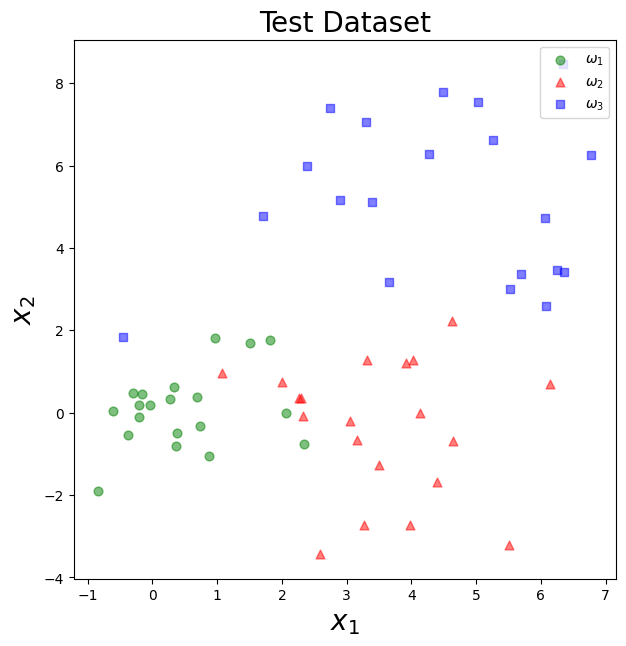

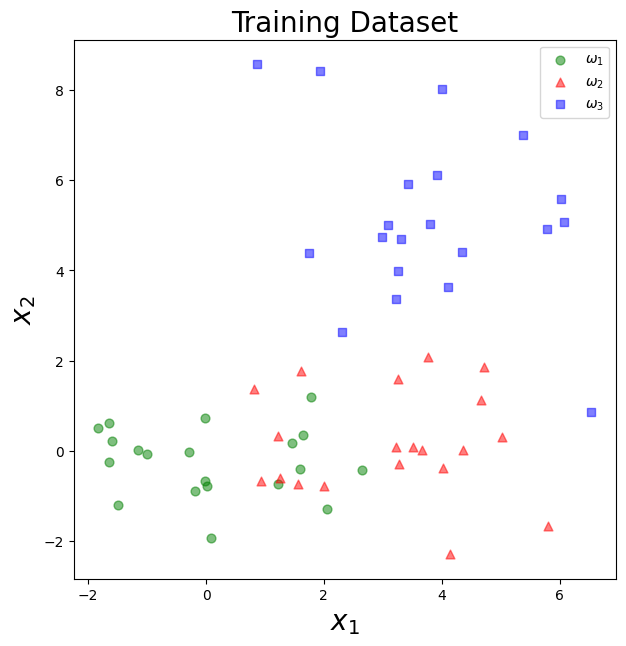

In [26]:
# Visualizing samples by plotting them in a scatter plot

import numpy as np
from matplotlib import pyplot as plt

for dset,title in zip((test_set, train_set), ['Test', 'Training']):
    f, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(dset[dset[:,2] == 1][:,0], dset[dset[:,2] == 1][:,1], \
           marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
    ax.scatter(dset[dset[:,2] == 2][:,0], dset[dset[:,2] == 2][:,1], \
           marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
    ax.scatter(dset[dset[:,2] == 3][:,0], dset[dset[:,2] == 3][:,1], \
           marker='s', color='blue', s=40, alpha=0.5, label='$\omega_3$')
    plt.legend(loc='upper right')
    plt.title('{} Dataset'.format(title), size=20)
    plt.ylabel('$x_2$', size=20)
    plt.xlabel('$x_1$', size=20)
plt.show()

Now, it is time to classify the test data and calculate the empirical error.

In [27]:
import prettytable

classification_dict, error = empirical_error(train_set, test_set, 1, 2, [1,2,3], bayes_classifier)

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'test dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical test Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+--------------+----------------+----------------+----------------+
| test dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+--------------+----------------+----------------+----------------+
| w1 (actual)  |       16       |       4        |       0        |
| w2 (actual)  |       12       |       7        |       1        |
| w3 (actual)  |       12       |       0        |       8        |
+--------------+----------------+----------------+----------------+
Empirical test Error: 0.48 (48.33%)


In [28]:
import prettytable

classification_dict, error = empirical_error(train_set, train_set, 1, 2, [1,2,3], bayes_classifier)

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'test dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical train Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+--------------+----------------+----------------+----------------+
| test dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+--------------+----------------+----------------+----------------+
| w1 (actual)  |       18       |       2        |       0        |
| w2 (actual)  |       1        |       19       |       0        |
| w3 (actual)  |       0        |       0        |       20       |
+--------------+----------------+----------------+----------------+
Empirical train Error: 0.05 (5.00%)


### 3.3.5 Implementation in 3-dimensional data case

Let us generate random 3-dimensional data for 3 classes from a multivariate Gaussian distribution with the following parameters:

$$
p(x|ω_{1}) \sim	N(u_{i}, \Sigma_{i}) \sim \frac{1}{(\sqrt{2\pi})^{d}|\Sigma|^{1/2}}exp\;[-\frac{1}{2}(x-u)^{t}\Sigma^{-1}(x-u)]
$$
$$ \\ $$
$$
p([x_{1},x_{2},x_{3}]^{t}|ω_{1}) \sim N([0,0,0]^{t},1I),\\
p([x_{1},x_{2},x_{3}]^{t}|ω_{2}) \sim N([1,1,1]^{t},2I),\\
p([x_{1},x_{2},x_{3}]^{t}|ω_{3}) \sim N([2,2,2]^{t},3I),\\
$$

and

$$
P(ω_{1}) = P(ω_{2}) = P(ω_{3}) = \frac{1}{3}
$$

Now, we will create 120 random samples for each of the 3 classes, and divide it into a equally-sized training and test data set, so that each set will contain 30 samples from each class.

In [29]:
import numpy as np

# Covariance matrices
cov_mats = {}
for i in range(1,4):
    cov_mats[i] = i * np.eye(3)

# mean vectors    
mu_vecs = {}
for i,j in zip(range(1,4), [[0,0,0], [1,1,1], [2,2,2]]):
    mu_vecs[i] = np.array(j).reshape(3,1)

In [30]:
# Generating the random samples
all_samples = {}
for i in range(1,4):
    # generating 40x2 dimensional arrays with random Gaussian-distributed samples
    class_samples = np.random.multivariate_normal(mu_vecs[i].ravel(), cov_mats[i], 40)
    # adding class label to 3rd column
    class_samples = np.append(class_samples, np.zeros((40,1))+i, axis=1)
    all_samples[i] = class_samples

In [31]:
# Dividing the samples into training and test datasets
train_set = np.append(all_samples[1][0:20], all_samples[2][0:20], axis=0)
train_set = np.append(train_set, all_samples[3][0:20], axis=0)

test_set = np.append(all_samples[1][20:40], all_samples[2][20:40], axis=0)
test_set = np.append(test_set, all_samples[3][20:40], axis=0)

assert(train_set.shape == (60, 4))
assert(test_set.shape == (60, 4))

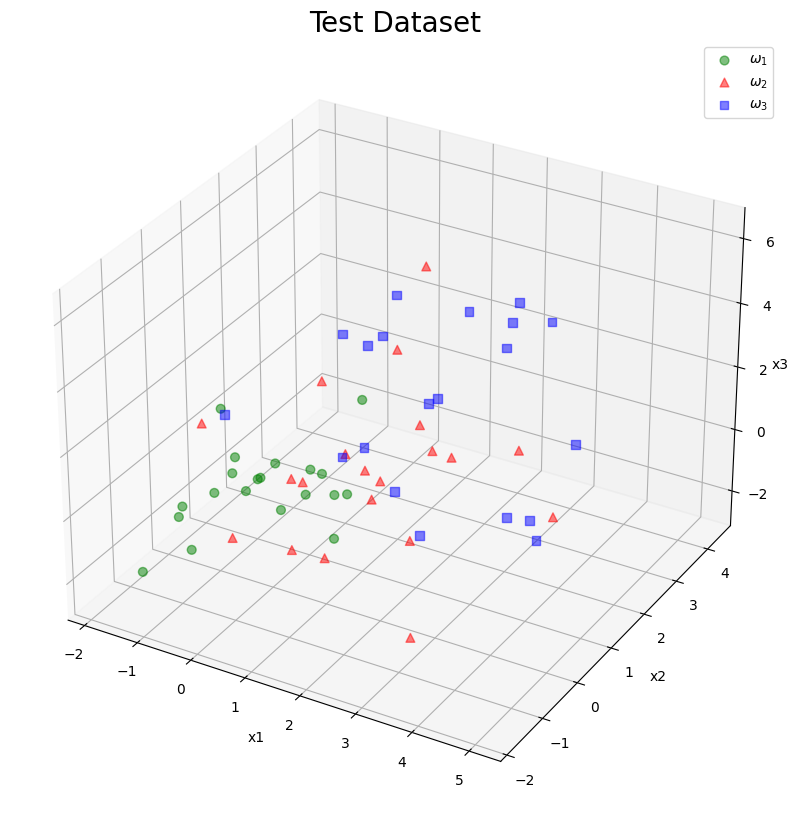

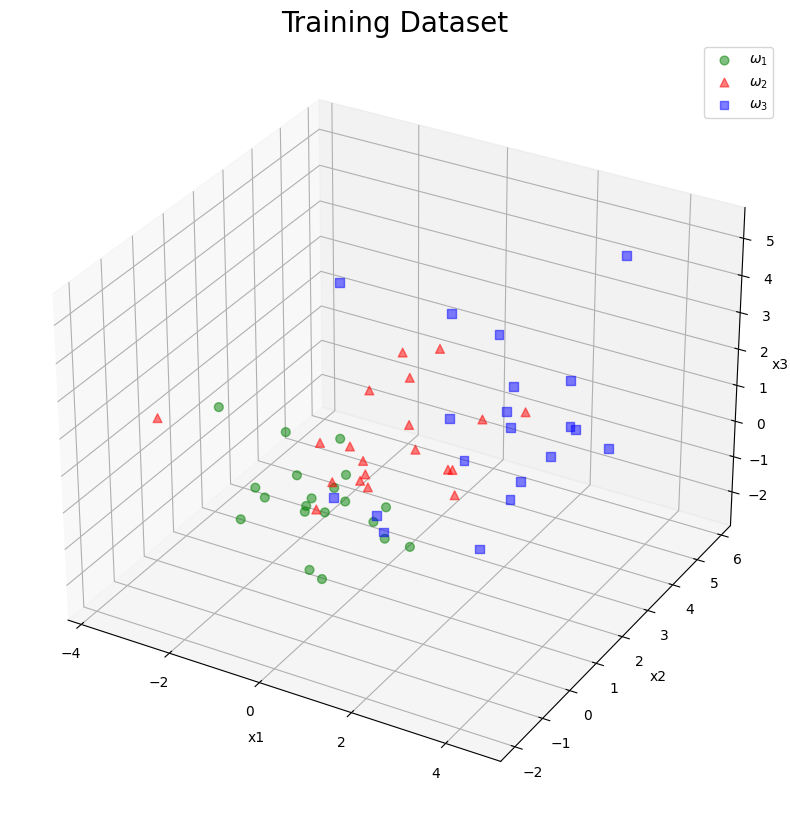

In [32]:
# Visualizing samples by plotting them in a scatter plot

import numpy as np
from matplotlib import pyplot as plt

for dset,title in zip((test_set, train_set), ['Test', 'Training']):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(dset[dset[:,3] == 1][:,0], dset[dset[:,3] == 1][:,1], dset[dset[:,3] == 1][:,2], 
               marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
    ax.scatter(dset[dset[:,3] == 2][:,0], dset[dset[:,3] == 2][:,1], dset[dset[:,3] == 2][:,2],
               marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
    ax.scatter(dset[dset[:,3] == 3][:,0], dset[dset[:,3] == 3][:,1], dset[dset[:,3] == 3][:,2],
               marker='s', color='blue', s=40, alpha=0.5, label='$\omega_3$')
    plt.legend(loc='upper right')
    plt.title('{} Dataset'.format(title), size=20)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3', labelpad=-2)
plt.show()

Now, it is time to classify the test data and calculate the empirical error.

In [33]:
import prettytable

classification_dict, error = empirical_error(train_set, test_set, 1, 3, [1,2,3], bayes_classifier)

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'test dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical test Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+--------------+----------------+----------------+----------------+
| test dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+--------------+----------------+----------------+----------------+
| w1 (actual)  |       17       |       2        |       1        |
| w2 (actual)  |       16       |       2        |       2        |
| w3 (actual)  |       17       |       2        |       1        |
+--------------+----------------+----------------+----------------+
Empirical test Error: 0.67 (66.67%)


In [34]:
import prettytable

classification_dict, error = empirical_error(train_set, train_set, 1, 2, [1,2,3], bayes_classifier)

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'test dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical train Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+--------------+----------------+----------------+----------------+
| test dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+--------------+----------------+----------------+----------------+
| w1 (actual)  |       19       |       1        |       0        |
| w2 (actual)  |       3        |       17       |       0        |
| w3 (actual)  |       1        |       1        |       18       |
+--------------+----------------+----------------+----------------+
Empirical train Error: 0.10 (10.00%)


---------------

# 4. Estimators

In statistics, estimation refers to the process of using sample data to infer the characteristics of a population. There are various types of estimators that can be used for this purpose, including point estimators and interval estimators.

## 4.1 Point Estimators

### 4.1.1. What's a point Point Estimator
A point estimator is a single value that is used to estimate a population parameter. For example, the sample mean is a point estimator for the population mean. Point estimators are often used because they are easy to compute and interpret, but they can be less precise than interval estimators.<br> <br>
In other words, Point estimators are functions that are used to find an approximate value of a population parameter from random samples of the population. They use the sample data of a population to calculate a point estimate or a statistic that serves as the best estimate of an unknown parameter of a population.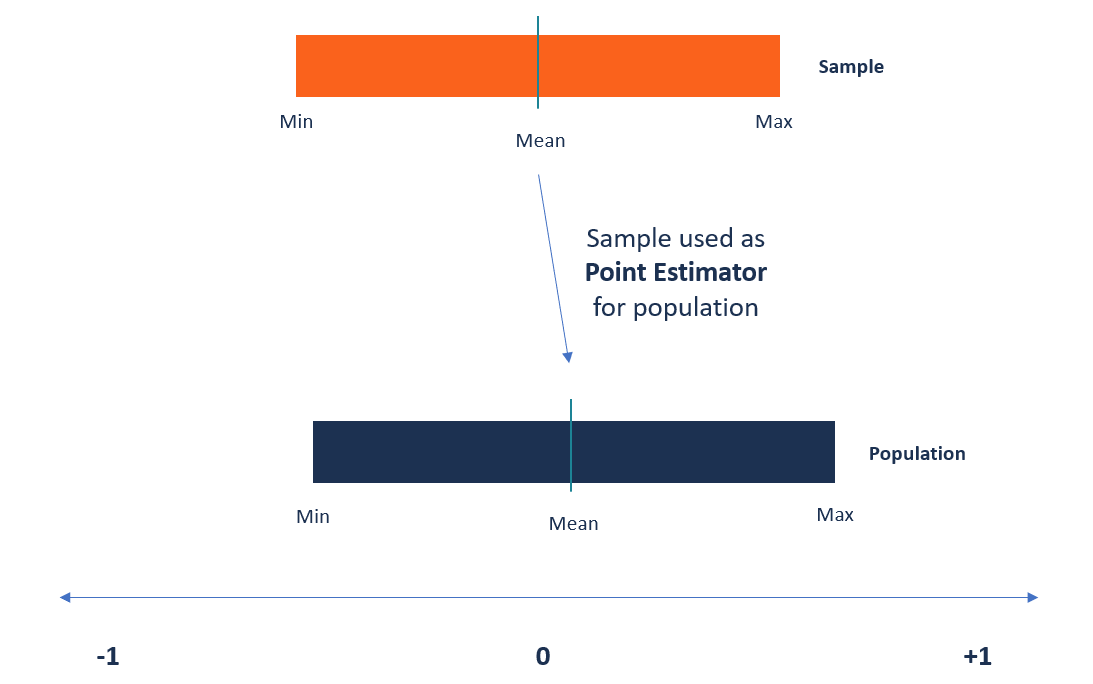
Most often, the existing methods of finding the parameters of large populations are unrealistic. For example, when finding the average age of kids attending kindergarten, it will be impossible to collect the exact age of every kindergarten kid in the world. Instead, a statistician can use the point estimator to make an estimate of the population parameter.

### 4.1.2. An example of how you can use the sample mean as a point estimator for the population mean
Using the same above "Titanic" dataset:

we will compute the sample mean of the 'age' column, which represents the age of the passengers. The sample mean will be the point estimator for the population mean of the ages of the passengers :

In [35]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Calculate the sample mean of the 'age' column
sample_mean = titanic['age'].mean()

The output will be a single number, which is the sample mean of the 'age' column. For example, if the dataset contains data on 1000 passengers, the output might be something like:

In [36]:
# Print the sample mean
print(sample_mean)

29.69911764705882


This means that the sample mean of the ages of the passengers is 29.699, which is the point estimate for the population mean.

>Point estimation can be used in a variety of situations where you want to estimate a population parameter using sample data. Some examples include:
>
>- Estimating the mean of a population: You can use the sample mean as a point estimator for the population mean.
>
>- Estimating the proportion of a population with a certain characteristic: You can use the sample proportion as a point estimator for the population proportion.
>
>- Estimating the variance or standard deviation of a population: You can use the sample variance or sample standard deviation as point estimators for the population variance or standard deviation.
>
>- Estimating the correlation between two variables in a population: You can use the sample correlation coefficient as a point estimator for the population correlation coefficient.
>
Point estimators can be useful because they are easy to compute and interpret, but they may be less precise than interval estimators, which provide a range of values rather than a single value.

## 4.2. Interval Estimators - Confidence Interval

Confidence intervals provide an alternative to using an estimator $\hat{θ}$ when we wish to estimate
an unknown parameter $θ$. We can find an interval (A, B) that we think has high probability
of containing $θ$. The length of such an interval gives us an idea of how closely we can estimate $θ$

### 4.2.1 What do I need the confidence interval for?
In statistics, parameters of the population are often estimated based on a sample,Because it is sometimes difficult to calculate an accurate average for a large population, for example, if we want to calculate the average heights of all NBA players, maybe we can't get all the values, so we take a sample and use them to estimate the parameter. But these are only estimates and the true value in the population will lie somewhere around these estimates. Now it is very useful to define a range or interval in which the true value will lie with a high probability, this range is called confidence interval.


### 4.2.2 Calculate confidence interval
To calculate the confidence interval, the distribution function of the respective parameter (e.g. the mean value) in the population is required. If this distribution is assumed to be normally distributed, the confidence interval for the mean value is given by: 

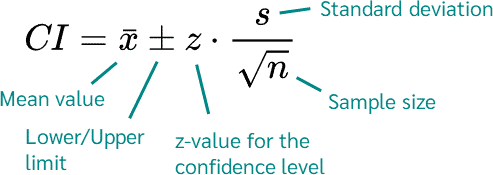


Where x̄ is the mean of the sample estimated, n is the size of the sample, and s is the standard deviation of the sample. Plus and minus indicate the lower and upper limits of the confidence interval, respectively.


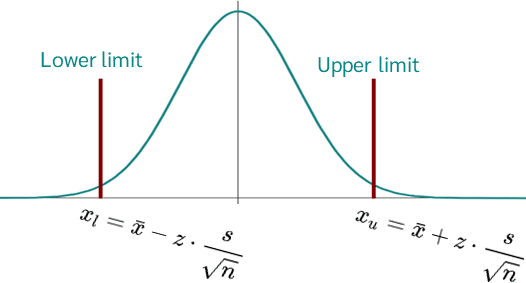

If the sample is small, the t-distribution is used instead of the normal distribution. Then the z-value is replaced by the t and the formula results in


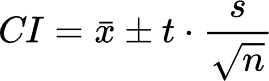

### The confidence level
For the calculation of the confidence interval, the probability must be defined with which the mean value of the population should lie in the interval.<br>
Scientists usually search for the 95% confidence interval, but it’s very common to use 90% or even 99% as well. So, when you ask me about my height, I should answer you with an error estimate or with a confidence interval, like “with a 95% confidence I’m from 1.92 m to 1.93 m tall”. <br>
Very often the confidence level used as probability. This probability is also called the confidence coefficient.

Z = Standard Normal Distribution Quantile of $(1−CI)/2$. This can be calculated using $-scipy.stats.norm.ppf((1 - CI) / 2)$. For CI = 0.95, Z = 1.95996. If finding a 1 sided interval, don’t divide by 2 in the formula.

For the 95% confidence interval and the 99% confidence interval, the z-values are as follows: <br>
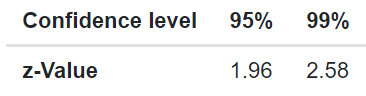


If a confidence interval of 95% is given, one can be 95% sure that the true mean value lies within this interval.
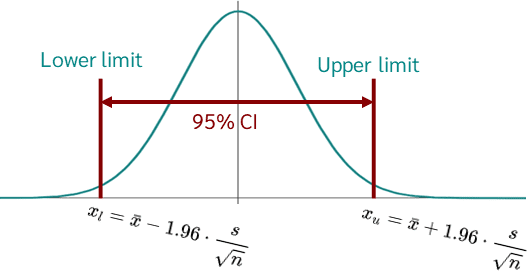

For example lets calculate the confidence interval of the mean value of the height <br>
For our dataset we have the nba heights and lets suppose it is normally distributed <br> <br>
I generated a random data normaly distributed using numpy, determining the mean and standard deviation for the distribution. The average height of an NBA player is around 6'7" with a standard deviation of around 2-3 inches.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
np.seterr(divide = 'ignore') 

mean = 6.7  # feet 
std = 2 # inches
sample_heights = np.random.normal(mean, std, size=100) # generate 100 values
# convert heights from feet and inches to inches
sample_heights = sample_heights * 12 + np.random.normal(0, std, size=100)
sample_heights

array([ 92.67776589,  74.26538219,  78.75838993, 115.89744157,
        95.32899298,  68.74001084,  81.99903087, 103.54861048,
        59.52145158,  60.34093308,  45.22581069,  37.0647353 ,
       130.72581304,  63.0264909 , 119.1106622 ,  87.7463083 ,
        96.22747949, 112.71496451, 126.47954368,  84.51037318,
        90.26710618, 104.40485588,  59.04153177, 128.55735857,
        77.8830606 ,  90.3902558 ,  81.30409392,  94.8717686 ,
        81.35279259,  95.68542716,  90.76276519,  72.22657344,
        54.31545714,  66.52980155,  57.11888998, 110.91034574,
        89.68623845,  53.08015579,  89.51135907,  87.28656133,
        86.98986282,  91.56132096, 105.01516642, 119.94061712,
        49.59585863,  85.88094279, 103.12854155,  71.22725077,
       106.43424633,  61.37447476,  64.82865537, 100.97687657,
        96.02683453,  71.70227216,  88.12497802,  69.1270494 ,
        81.74919503,  73.28793143,  87.84418641, 124.37792128,
        80.70505151, 137.62754656,  87.8600321 ,  56.56

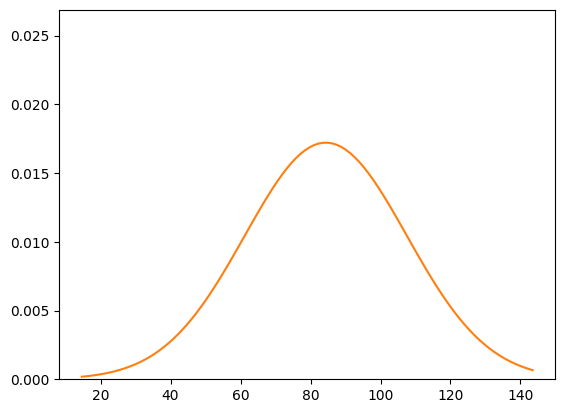

In [38]:
# plot the data as a histogram
plt.hist(sample_heights, bins=20, density=True,histtype='step', alpha=0)
# overlay a normal curve on the histogram
mu, std = sample_heights.mean(), sample_heights.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = plt.plot(x, stats.norm.pdf(x, mu, std))
plt.show()

### 4.2.3 Steps to calculate the confidence interval
Using the following steps and the formula:

### a. Find the sample mean
Calculate the mean of your sample. Add up all the values in your data set and divide the sum by the number of values in the sample. <br>
we are going to calculate the mean using Python

In [39]:
x_ = sample_heights.mean() 
x_

84.36117468506426

### b. Calculate the standard deviation
we are going to calculate the mean using Numpy

In [40]:
s=np.std(sample_heights)
s

23.171850048195665

In [41]:
se=s/np.sqrt(len(sample_heights))
se

2.3171850048195664

### c. Choose the confidence level 
we take 95% confidence, we get $z-Value=1,96$

### d. Use these results in the formula:

In [42]:
x1=x_+1.96*(s/np.sqrt(len(sample_heights)))
x2=x_-1.96*(s/np.sqrt(len(sample_heights)))
CI=(x1,x2)
CI 

(88.90285729451061, 79.8194920756179)

**Visualisation of the Confidence interval :**

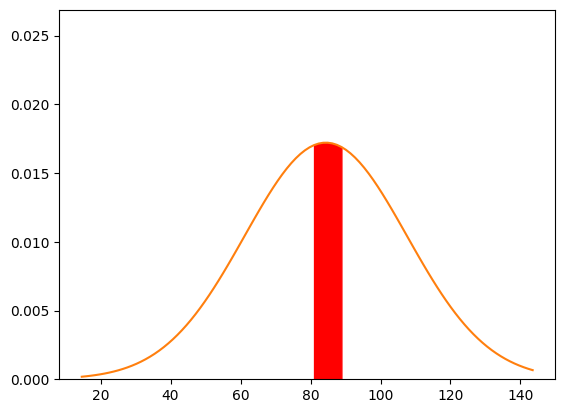

In [43]:
# plot the data as a histogram
plt.hist(sample_heights, bins=20, density=True,histtype='step', alpha=0)
# overlay a normal curve on the histogram
mu, std = sample_heights.mean(), sample_heights.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = plt.plot(x, stats.norm.pdf(x, mu, std))

# highlight the confidence interval
plt.fill_between(x, stats.norm.pdf(x, mu, std),y2=0, where=(x > CI[1]) & (x <= CI[0]), color='red')

plt.show()

### Interpretation
There is a 95% chance that the confidence interval of [81.054, 71.006] contains the true population mean height of NBA Players.

------------------

## 4.3. Maximum Likelihood Estimation

The maximum likelihood, simply known as MLE, is a method of estimating the parameters of a statistical model based on a given sample of data. It is based on the idea that the probability of observing a particular set of data is highest when the parameters of the model are set to their most likely values.Maximum Likelihood Estimation helps find the most likely-to-occur distribution parameters.

To calculate the maximum likelihood for a given data set, we need to specify a statistical model that describes the data. This model should specify a probability distribution for the data and define the parameters of the distribution. For example, if we are trying to model the heights of NBA players, we might use a normal distribution with mean $mu$ and standard deviation sigma $\sigma$ as our model.

Once we have defined your model, we can use the maximum likelihood method to estimate the values of the parameters mu and sigma that are most likely to have generated the data.

 ### 4.3.1. How to calculate the maximum likelihood

### the steps we can follow to calculate the maximum likelihood for the heights of NBA players:

#### 4.3.1.1 Defining the likelihood function.

The likelihood of an observed x-value, say $x_1$ is simply $\mathscr{l} = f(x_1)$.  If there are multple x-values, $x_1, x_2, x_3, \cdots , x_N$, the the likelihood is given py the product of the individual likelihoods,
L(θ|x1,x2,...,xn)=f(x1,x2,...,xn|θ) = f(x1|θ)...f(xn|θ) =

$$
\mathscr{l} = \prod_{i=1}^N f(x_i)
$$

We want to find $\mu$ and $\sigma$ given a bunch of x-values and assuming a normal distribution.  We do this my choosing $\mu$ and $\sigma$ as to maximize the likelihood.  In practice, one actually maximizes the log of the likelihood as this doesn't affect the estiamted values of our unknown parameters, but does simplify the calculation, both analytically and numerically.
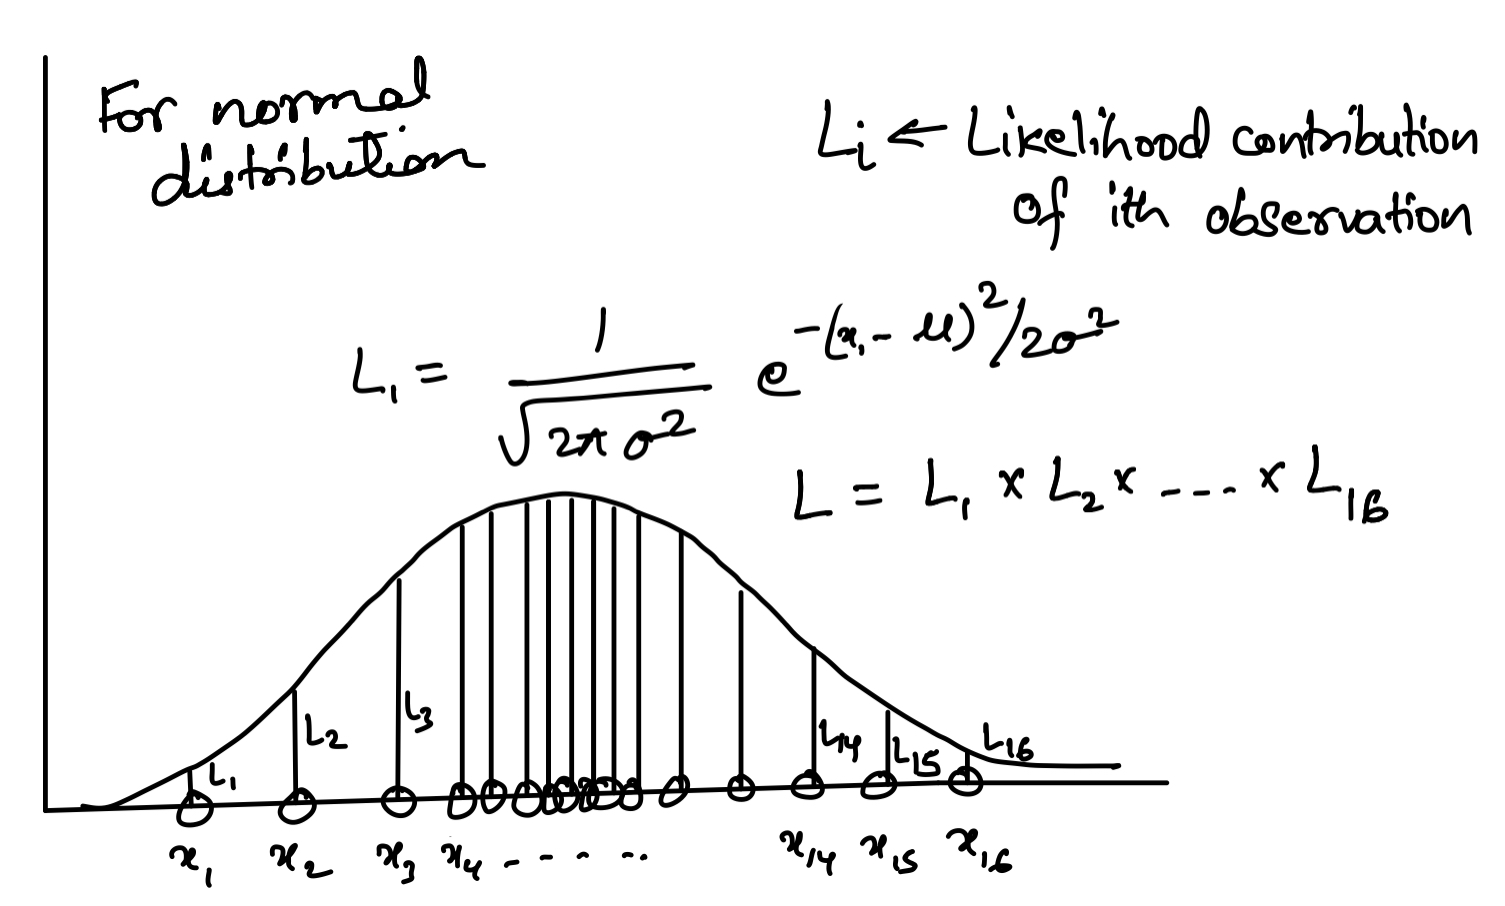

We find the maximum by setting the derivatives equal to zero:

$$\frac{d\ln(\mathscr{l})}{d\mu} = 0$$
and
$$
\frac{d\ln(\mathscr{l})}{d\sigma} = 0
$$

If we solve these we get,
$$
\mu^* = \frac{1}{N}\sum^N_{i = 1} x_i
$$
and
$$\sigma^* = \sqrt{
\frac{1}{N}\sum^N_{i=1} (x_i - \mu^*)^2}
$$

The results for the normal distribution turn out to be the sample mean and standard deviation

In [44]:
def likelihood(parameters):
    mu, sigma = parameters
    return np.prod([model(x, mu, sigma) for x in sample_heights])

#### 4.3.1.2 Defining the statistical model.
The normal density function

Modeling the heights of NBA players using a normal distribution, our model might look like this:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(
    \frac{x-\mu}{\sigma} \right)^2}
$$

 x is the data (the heights of the NBA players), mu is the mean of the distribution, and sigma is the standard deviation.

In [45]:
def model(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2)) 

#### 4.3.1.3 Maximize the likelihood function
**Define an initial set of parameter values and use an optimization algorithm to maximize the likelihood function.**
There are several optimization algorithms available in Python, such as "scipy.optimize.minimize" and "scipy.optimize.curve_fit". For example, using scipy.optimize.minimize:

In [46]:
import scipy.optimize as optimize

# define an initial set of parameter values
initial_guess = (x_, s)

# maximize the likelihood function
result = optimize.minimize(lambda params: -likelihood(params), initial_guess)

# get the maximum likelihood estimates of the parameters
mu_ml, sigma_ml = result.x
mu_ml, sigma_ml 

(84.36117468506426, 23.171850048195665)

### 4.3.2. Maximum likelihood estimation for the regression parameters

In [47]:
from scipy.optimize import minimize
import statsmodels.api as sm
from scipy.stats import norm
df = pd.read_csv('Dataset/weatherHistory.csv')
df.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.


The Szeged weather dataset is a collection of daily weather observations from Szeged, Hungary. It includes the following features:

Data available in the hourly response:

- Formatted Date: This is the date of the observation, in a standardized format.
- summary: This is a short summary of the weather conditions for the day. It may include a description of the sky (e.g. "clear" or "partly cloudy"), as well as other details about the weather.
- precipType: This is the type of precipitation that was observed (e.g. rain, snow, sleet). If no precipitation was observed, this field will be blank.
- temperature: This is the temperature, in degrees Fahrenheit, at the time of the observation.
- apparentTemperature: This is the apparent temperature, or what the temperature feels like to a human, in degrees Fahrenheit. This takes into account factors such as humidity and wind speed.
- humidity: This is the relative humidity, as a percentage, at the time of the observation.
- windSpeed: This is the wind speed, in miles per hour, at the time of the observation.
- windBearing: This is the direction that the wind is coming from, in degrees, at the time of the observation.
- visibility: This is the visibility, in miles, at the time of the observation.
- cloudCover: This is the percentage of the sky that is covered by clouds, at the time of the observation.
- pressure: This is the atmospheric pressure, in millibars, at the time of the observation.
- Daily Summary : Daily Summary: This is a summary of the weather conditions for the day

<br><br>
This dataset could be used to study patterns in weather or to build a model to predict whether it will rain tomorrow based on the other features in the dataset.

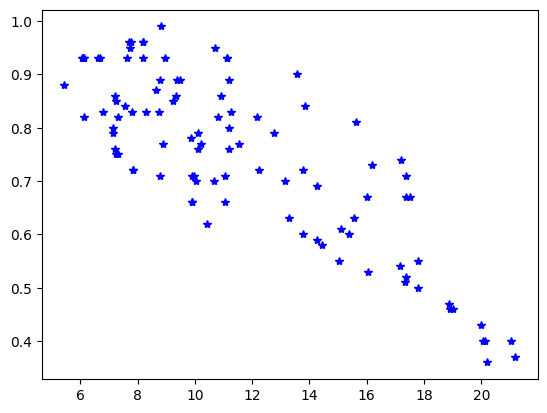

In [48]:
x = df['Temperature (C)'][:100]
y = df['Humidity'][:100]
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')

##### Apply the Maximum Likelihood Estimation method to obtain the relationship
We first define the likelihood function, likelihood. We assume that the error terms follow the Normal distribution and then we maximize the sum of the logs of the individual terms. Here, we use the minimize function from scipy. Hence, to obtain the maximum of L, we find the minimum of -L (remember that the log is a monotonic function or always increasing). Further, we apply the contraints to keep the sigma to be positive for our convergence routine.

In [49]:
# define the model
def lik_model(x, m, b, sigma):
    return m*x+b

# define the negative log-likelihood function
def lik(parameters, x, y):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    
    y_exp = lik_model(x, m, b, sigma)
    L = np.sum(np.log(norm.pdf(y - y_exp, loc=0, scale=sigma)))
    return -L

# define constraints
def constraints(parameters):
    # unpack the parameters
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    
    # define constraints
    if sigma <= 0:
        return -1
    if m < 0:
        return -1
    if b < 0:
        return -1
    return 1
cons = {'type': 'ineq','fun': constraints}

We start with initial guess of the parameters: [2, 2, 2] (m, b, sigma). It doesn’t have to be accurate but simply reasonable.

In [50]:
lik_model = minimize(lik, np.array([2, 2, 2]), args=(x,y,), constraints=cons) 

We have obtained a successful convergence of our optimization function.

In [51]:
# print the results
print("m =", lik_model.x[0])
print("b =", lik_model.x[1])
print("sigma =", lik_model.x[2])

m = -0.030871455907493687
b = 1.103427809458404
sigma = 0.08996206708643435


The final parameters we obtained are: [-0.03087142, 1.10342661, 0.08996208]


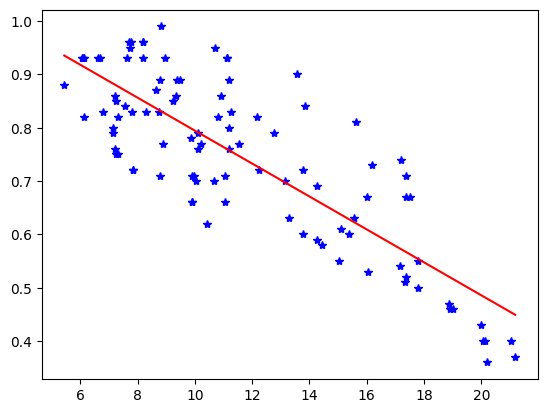

In [52]:
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy = lik_model.x[0] * xx +  lik_model.x[1]
ax.plot(xx,yy, 'r-')